# Introdução

Os dados disponibilizados na planilha são referentes às obras da Prefeitura de Fortaleza no período de 2012 a 2016. Eles estão disponíveis neste link: http://dados.fortaleza.ce.gov.br/catalogo/dataset/realizacoes-da-prefeitura-municipal-entre-2012-2016

Neste notebook, ...

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from ipyleaflet import Map, Marker # https://github.com/ellisonbg/ipyleaflet

# set plotting style
matplotlib.style.use('ggplot')

In [47]:
# read data from xls file and show its properties
data = pd.read_excel('./data/dadosrealizacoes.xls')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 5 columns):
Nome         398 non-null object
Descrição    398 non-null object
Latitude     398 non-null object
Longitude    398 non-null object
Tipo         398 non-null object
dtypes: object(5)
memory usage: 15.6+ KB


In [48]:
# data preprocessing

# replace commas by dots and convert latitudes and longitudes to float
def fixcomma(txt):
    if type(txt) is str:
        return txt.replace(',','.')
    else:
        return txt

data['Latitude'] = data['Latitude'].apply(fixcomma).astype(float)
data['Longitude'] = data['Longitude'].apply(fixcomma).astype(float)


data.head()

,Nome,Descrição,Latitude,Longitude,Tipo
0,Parquinho Amigo da Criança,Praça do Trem - Parquinho Amigo da Criança,-3.780073,-38.513191,Esporte e Lazer
1,Programa Segundo Tempo do bairro Aerolândia,Programa Segundo Tempo do bairro Aerolândia,-3.773602,-38.512515,Esporte e Lazer
2,Abraça Fortaleza,Abraça Fortaleza - prestação de serviços a com...,-3.771231,-38.530314,Governo e Sociedade
3,Posto de Saúde,Posto de Saúde,-3.760524,-38.526976,Saúde
4,Obra de Restauro,Restauro do Mercado da Aerolândia,-3.776398,-38.528044,Urbanismo e Meio Ambiente


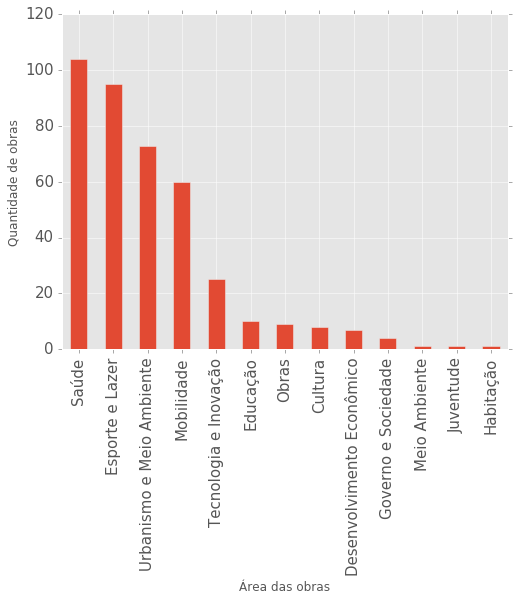

In [3]:
plt.figure()
ax = data['Tipo'].value_counts().plot.bar(figsize=(8,6), fontsize=15)
ax.set_xlabel('Área das obras')
ax.set_ylabel('Quantidade de obras')

Pode-se ver que maior parte das obras se concentram nas áreas da Saúde, Esporte e Lazer, Urbanismo e Meio Ambiente, e Mobilidade. 

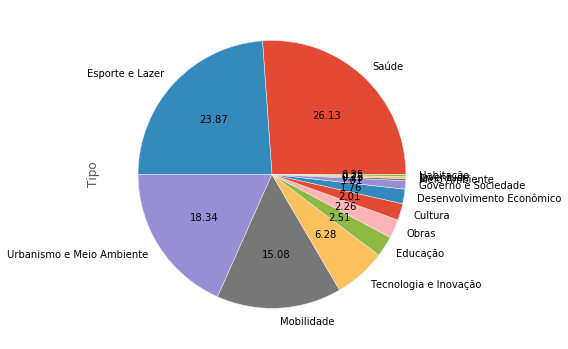

In [4]:
# maybe a pie plot is more adapted to the data?
plt.figure()
ax = data['Tipo'].value_counts().plot.pie(figsize=(6,6), fontsize=10, autopct='%.2f')

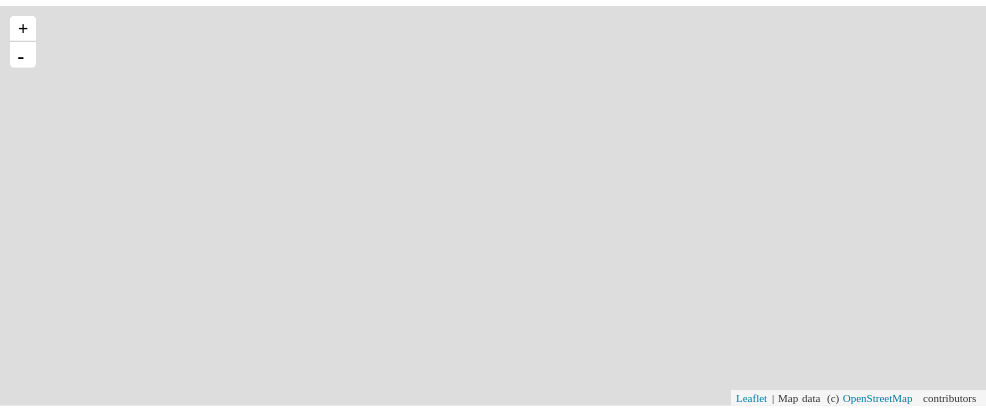

In [82]:
# set up map
center = data.iloc[0][['Latitude','Longitude']].tolist()
zoom = 10
m = Map(default_tiles=TileLayer(opacity=1.0), center=center, zoom=zoom)

# define colors associated with each place type
dic_color={'Saúde':'#FF0',
 'Esporte e Lazer':'#F00',
 'Urbanismo e Meio Ambiente':'#0F0',
 'Mobilidade':'#001',
 'Tecnologia e Inovação':'#F55',
 'Educação':'#333',
 'Obras':'#222',
 'Cultura':'#111',
 'Desenvolvimento Econômico':'#055',
 'Governo e Sociedade':'#440',
 'Meio Ambiente':'#123',
 'Juventude':'#321',
 'Habitação':'#000'}

# create circles and append to the map
for index, row in data.iterrows():
    location = row[['Latitude','Longitude']].tolist()
    c = Circle(location=row[['Latitude','Longitude']].tolist(),
               radius = 60,
               weight = 1,
               color = dic_color[row['Tipo']],
               opacity = 1.0,
               fill_opacity = 1.0,
               fill_color = dic_color[row['Tipo']])
    m.add_layer(c)

# display map
m

# TODO: colocar informações das obras no mapa

In [78]:
data['Tipo'].value_counts().index.tolist()